# Total Production Units for Self-Consumption

### Master in Data Science and Engineering - FEUP

#### Group 4
202107955 - Beatriz Iara Nunes Silva
\
202206252 - Inês Clotilde da Costa Neves
\
202502527 - Kirill Savin
\
202502528 - Mariana Rocha Cristino
\
202202895 - Patrícia Crespo da Silva

<div id="top"></div>

# Table of Content

<ol>
    <li><h4><a href="#introduction">Introduction</a></h4></li>
    <li><h4><a href="#research">Research Questions</a></h4></li>
    <li><h4><a href="#data">Data</a></h4></li>
    <li><h4><a href="#inference">Inferences</a></h4></li>
        <h5>4.1 <a href="#rq1">Research Question 1</a></h5>
        <h5>4.2 <a href="#rq2">Research Question 2</a></h5>
        <h5>4.3 <a href="#rq3">Research Question 3</a></h5>
    <li><h4><a href="#results">Results and Discussion</a></h4></li>
    <li><h4><a href="#conclusion">Conclusion</a></h4></li>    

</ol>

# Introduction

<div id="research"></div>
<strong><a href="#top">Back to top</a></strong>

# Research Questions

**General Research Question:**
* RQ: Compare how seasonal (winter vs summer), regional, and technical factors shape self-consumption energy production patterns in Portugal between 2023 and 2024.

**Specifics Research Questions:**
* RQ1: Compare the average installed capacity per UPAC across different power levels and districts in 2023 and 2024. - Kirill
* RQ2: Compare the evolution of installed capacity between 2023 and 2024 across residential and industrial UPACs to assess differences in growth patterns. - Iara and Mariana
* RQ3: Compare the total installed capacity for self-consumption across different power scales (installed capacity ranges) and seasons (winter vs. summer) in selected Portuguese districts during 2023 and 2024. - Inês and Patrícia

Districts for SRQ: Aveiro, Évora, Vila Real and Faro

<div id="research"></div>
<strong><a href="#top">Back to top</a></strong>

# Data

## Libraries

In [27]:
import geopandas as gpd
import json
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from matplotlib import patheffects
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels

## Prepare Data

Reading the dataset:

In [28]:
#df_origin = pd.read_csv('../Data/UPAC_Total_Production.csv', sep=';', decimal='.')
df_origin = pd.read_csv('UPAC_Total_Production.csv', sep=';', decimal='.')

df_origin.head(10)

,Quarter,District,Municipality,Parish,Zip Code,Technology Type,Voltage level,Installed power range (kW),Number of installations,Total installed power (kW),DistrictCode,Municipality Code,DistrictMunicipalityParishCode,CPEs (#),relacao_instalacoes_por_cpe,relacao_potencia_por_cpe
0,2023T1,Coimbra,Condeixa-a-Nova,Furadouro,3150,Solar,BTN,"]0, 4]",2,3.00,6,604,060407,9537.0,0.000210,0.000315
1,2023T1,Coimbra,Condeixa-a-Nova,Zambujal,3150,Solar,BTN,"]0, 4]",2,4.32,6,604,060410,9537.0,0.000210,0.000453
2,2023T1,Coimbra,Condeixa-a-Nova,Condeixa-a-Velha e Condeixa-a-Nova,3150,Não Atribuído,BTN,"]0, 4]",1,1.05,6,604,060411,9537.0,0.000105,0.000110
3,2023T1,Coimbra,Condeixa-a-Nova,Vila Seca e Bem da Fé,3150,Solar,BTN,"]0, 4]",17,28.14,6,604,060413,9537.0,0.001783,0.002951
4,2023T1,Coimbra,Figueira da Foz,São Pedro,3090,Não Atribuído,BTN,"]0, 4]",2,3.28,6,605,060514,50436.0,0.000040,0.000065
5,2023T1,Coimbra,Figueira da Foz,Moinhos da Gândara,3080,Não Atribuído,BTN,"]0, 4]",1,2.00,6,605,060518,50436.0,0.000020,0.000040
6,2023T1,Coimbra,Figueira da Foz,Buarcos e São Julião,3080,Não Atribuído,BTN,"]0, 4]",9,13.59,6,605,060520,50436.0,0.000178,0.000269
7,2023T1,Coimbra,Figueira da Foz,Buarcos e São Julião,3080,Solar,BTN,"]0, 4]",128,202.51,6,605,060520,50436.0,0.002538,0.004015
8,2023T1,Coimbra,Figueira da Foz,Ferreira-a-Nova,3090,Não Atribuído,BTN,"]0, 4]",3,4.96,6,605,060521,50436.0,0.000059,0.000098
9,2023T1,Coimbra,Figueira da Foz,Lavos,3090,Solar,BTN,"]0, 4]",93,112.51,6,605,060522,50436.0,0.001844,0.002231


Rename the last two columns to English

In [29]:
df_origin = df_origin.rename(columns={
    "relacao_instalacoes_por_cpe": "installations_per_cpe_ratio",
    "relacao_potencia_por_cpe": "power_per_cpe_ratio"
})
print(df_origin.columns)

Index(['Quarter', 'District', 'Municipality', 'Parish', 'Zip Code',
       'Technology Type', 'Voltage level', 'Installed power range (kW)',
       'Number of installations', 'Total installed power (kW)', 'DistrictCode',
       'Municipality Code', 'DistrictMunicipalityParishCode', 'CPEs (#)',
       'installations_per_cpe_ratio', 'power_per_cpe_ratio'],
      dtype='object')


Dataset info

In [30]:
print("\nDataset info:")
print(df_origin.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121294 entries, 0 to 121293
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Quarter                         121294 non-null  object 
 1   District                        121294 non-null  object 
 2   Municipality                    121294 non-null  object 
 3   Parish                          121294 non-null  object 
 4   Zip Code                        121294 non-null  int64  
 5   Technology Type                 121283 non-null  object 
 6   Voltage level                   121292 non-null  object 
 7   Installed power range (kW)      121294 non-null  object 
 8   Number of installations         121294 non-null  int64  
 9   Total installed power (kW)      121294 non-null  float64
 10  DistrictCode                    121294 non-null  int64  
 11  Municipality Code               121294 non-null  int64  
 12  D

Non-Numeric Columns

In [31]:
non_numeric = df_origin.select_dtypes(exclude=['number'])


for col in non_numeric.columns:
    unique_vals = df_origin[col].unique().tolist()
    print(f"Column: {col} — {len(unique_vals)} unique values")
    print(unique_vals)
    print("-" * 40)

Column: Quarter — 11 unique values
['2023T1', '2023T2', '2024T2', '2024T3', '2024T4', '2023T3', '2023T4', '2024T1', '2025T1', '2025T2', '2022T4']
----------------------------------------
Column: District — 18 unique values
['Coimbra', 'Évora', 'Faro', 'Guarda', 'Leiria', 'Lisboa', 'Portalegre', 'Porto', 'Santarém', 'Setúbal', 'Viana do Castelo', 'Vila Real', 'Viseu', 'Aveiro', 'Beja', 'Braga', 'Bragança', 'Castelo Branco']
----------------------------------------
Column: Municipality — 278 unique values
['Condeixa-a-Nova', 'Figueira da Foz', 'Lousã', 'Mira', 'Miranda do Corvo', 'Montemor-o-Velho', 'Oliveira do Hospital', 'Pampilhosa da Serra', 'Penacova', 'Penela', 'Soure', 'Tábua', 'Vila Nova de Poiares', 'Alandroal', 'Arraiolos', 'Borba', 'Estremoz', 'Évora', 'Montemor-o-Novo', 'Mora', 'Portel', 'Redondo', 'Reguengos de Monsaraz', 'Vendas Novas', 'Viana do Alentejo', 'Vila Viçosa', 'Albufeira', 'Alcoutim', 'Aljezur', 'Castro Marim', 'Faro', 'Lagoa', 'Lagos', 'Loulé', 'Monchique', 'Ol

Translation Dictionary Technology Type

In [32]:
tech_type_translation = {
    'Solar': 'Solar',
    'Não Atribuído': 'Not Assigned',
    'Eólica': 'Wind',
    'Biogás': 'Biogas',
    'Cogeração não renovável': 'Non-renewable Cogeneration',
    'Hídrica': 'Hydro',
    'Biomassa': 'Biomass',
    'Fotovoltaica': 'Photovoltaic'
}

df_origin['Technology Type'] = df_origin['Technology Type'].map(tech_type_translation).fillna(df_origin['Technology Type'])
print(df_origin['Technology Type'].unique())


['Solar' 'Not Assigned' 'Wind' 'Biogas' 'Non-renewable Cogeneration'
 'Hydro' 'Biomass' 'Photovoltaic' nan]


### Data Selection

Removing unnecessary columns

In [33]:
cols_to_keep = [
    "Quarter",
    "District",
    "Municipality",
    "Parish",
    "Technology Type",
    "Voltage level",
    "Installed power range (kW)",
    "Number of installations",
    "Total installed power (kW)",
    "CPEs (#)",
    "installations_per_cpe_ratio",
    "power_per_cpe_ratio"
]

df_filtered = df_origin[cols_to_keep]
df_filtered.head(10)

,Quarter,District,Municipality,Parish,Technology Type,Voltage level,Installed power range (kW),Number of installations,Total installed power (kW),CPEs (#),installations_per_cpe_ratio,power_per_cpe_ratio
0,2023T1,Coimbra,Condeixa-a-Nova,Furadouro,Solar,BTN,"]0, 4]",2,3.00,9537.0,0.000210,0.000315
1,2023T1,Coimbra,Condeixa-a-Nova,Zambujal,Solar,BTN,"]0, 4]",2,4.32,9537.0,0.000210,0.000453
2,2023T1,Coimbra,Condeixa-a-Nova,Condeixa-a-Velha e Condeixa-a-Nova,Not Assigned,BTN,"]0, 4]",1,1.05,9537.0,0.000105,0.000110
3,2023T1,Coimbra,Condeixa-a-Nova,Vila Seca e Bem da Fé,Solar,BTN,"]0, 4]",17,28.14,9537.0,0.001783,0.002951
4,2023T1,Coimbra,Figueira da Foz,São Pedro,Not Assigned,BTN,"]0, 4]",2,3.28,50436.0,0.000040,0.000065
5,2023T1,Coimbra,Figueira da Foz,Moinhos da Gândara,Not Assigned,BTN,"]0, 4]",1,2.00,50436.0,0.000020,0.000040
6,2023T1,Coimbra,Figueira da Foz,Buarcos e São Julião,Not Assigned,BTN,"]0, 4]",9,13.59,50436.0,0.000178,0.000269
7,2023T1,Coimbra,Figueira da Foz,Buarcos e São Julião,Solar,BTN,"]0, 4]",128,202.51,50436.0,0.002538,0.004015
8,2023T1,Coimbra,Figueira da Foz,Ferreira-a-Nova,Not Assigned,BTN,"]0, 4]",3,4.96,50436.0,0.000059,0.000098
9,2023T1,Coimbra,Figueira da Foz,Lavos,Solar,BTN,"]0, 4]",93,112.51,50436.0,0.001844,0.002231


Selecting years of interest

In [34]:
df_filtered = df_filtered[df_filtered['Quarter'].str.startswith(('2023', '2024'))].copy()
print(df_filtered['Quarter'].value_counts())

Quarter
2023T3    13295
2024T4    11737
2024T3    11399
2024T2    11086
2024T1    10839
2023T1    10481
2023T4    10407
2023T2     9301
Name: count, dtype: int64


### Data Inspection and Cleaning

Checking for missing values

In [35]:
missing_df = pd.DataFrame({
    'Missing Values': df_filtered.isnull().sum(),
    'Percentage': (df_filtered.isnull().sum() / len(df_filtered)) * 100
})
print("\nMissing Values summary:")
display(missing_df[missing_df['Missing Values'] > 0])


Missing Values summary:


,Missing Values,Percentage
Voltage level,2,0.002259


In [36]:
print("Before dropping NA:", df_filtered.shape)
df_filtered = df_filtered.dropna()
print("After dropping NA:", df_filtered.shape)

Before dropping NA: (88545, 12)
After dropping NA: (88543, 12)


Check for duplicate rows

In [37]:
duplicates = df_filtered[df_filtered.duplicated()]
print(duplicates)
print("Number of duplicates:", df_filtered.duplicated().sum())

       Quarter  District         Municipality  \
3666    2024T2     Braga             Barcelos   
9221    2024T4    Lisboa                Mafra   
11106   2023T4      Faro                Loulé   
14824   2024T2      Faro                Loulé   
43536   2024T3  Santarém  Salvaterra de Magos   
44840   2023T2     Évora                Évora   
45738   2023T2     Braga            Guimarães   
54983   2024T1      Faro                Loulé   
56600   2024T1    Lisboa               Lisboa   
57315   2023T3     Porto           Matosinhos   
59164   2023T4     Évora                Évora   
62981   2024T2    Lisboa               Loures   
67272   2024T3    Lisboa               Lisboa   
68366   2024T3    Lisboa              Amadora   
87473   2023T4     Braga             Barcelos   
94814   2024T1    Lisboa              Amadora   
96966   2024T2  Santarém  Salvaterra de Magos   
97491   2024T2    Lisboa               Lisboa   
97935   2023T4    Lisboa              Amadora   
99945   2024T1    Li

In [38]:
print("Before dropping duplicates:", df_filtered.shape)
df_filtered = df_filtered.drop_duplicates()
print("After dropping duplicates:", df_filtered.shape)

Before dropping duplicates: (88543, 12)
After dropping duplicates: (88511, 12)


### Derived Metrics

**Percentage of Installations by Voltage Level per District**

According to E-redes ([Manual de Ligações à Rede](https://provedordocliente.e-redes.pt/Files/PDF/Manual-de-Ligacoes-a-Rede.pdf)):

*High Voltage (AT)*
- Companies with capacities >10 MVA, supplied at 60 kV.
- Clear proxy for heavy industry or large commercial facilities.
- Districts with a higher proportion of AT installations → more industrialized.

*Medium Voltage (MT)*
- Companies with capacities >200 kVA, voltages of 10–30 kV.
- Also indicates industrial activity or large commercial companies.
- Complements AT; districts with a higher proportion of MT → more industrialized areas, but less intense than AT.

*Low Voltage Normal (BTN) and Low Voltage Special (BTE)*
- **BTN** → residences, small shops/offices.
- **BTE** → small/medium companies (>41.4 kVA).
- Districts dominated by BTN → mainly residential areas.
- BTE is mixed, can indicate areas with small industries or commerce, but less significant than MT/AT.


In [39]:
# Make a copy
df = df_filtered.copy()

# Group by Quarter, District, and Voltage level, summing the Number of installations
grouped = (
    df.groupby(['Quarter', 'District', 'Voltage level'], as_index=False)['Number of installations'].sum()
)

# Pivot table to have Voltage levels as columns
pivot = grouped.pivot_table(
    index=['Quarter', 'District'],
    columns='Voltage level',
    values='Number of installations',
    fill_value=0
).reset_index()

# Ensure all expected voltage columns exist
for col in ['AT', 'MT', 'BTN', 'BTE']:
    if col not in pivot.columns:
        pivot[col] = 0

# Calculate total installations per row
pivot['Total'] = pivot[['AT','MT','BTN','BTE']].sum(axis=1)

# Calculate percentage per voltage level
pivot["District_High_Voltage_AT(%)"] = pivot['AT'] / pivot['Total'] * 100
pivot["District_Medium_Voltage_MT(%)"] = pivot['MT'] / pivot['Total'] * 100
pivot["District_Low_Voltage_BTN(%)"] = pivot['BTN'] / pivot['Total'] * 100
pivot["District_Low_Voltage_BTE(%)"] = pivot['BTE'] / pivot['Total'] * 100

# Select only the relevant columns
df_result = pivot[['Quarter', 'District',
                   'District_High_Voltage_AT(%)',
                   'District_Medium_Voltage_MT(%)',
                   'District_Low_Voltage_BTN(%)',
                   'District_Low_Voltage_BTE(%)']]

df_result


Voltage level,Quarter,District,District_High_Voltage_AT(%),District_Medium_Voltage_MT(%),District_Low_Voltage_BTN(%),District_Low_Voltage_BTE(%)
0,2023T1,Aveiro,0.052687,3.819810,94.362487,1.765016
1,2023T1,Beja,0.000000,3.415560,92.979127,3.605313
2,2023T1,Braga,0.022525,2.201825,96.564928,1.210722
3,2023T1,Bragança,0.000000,1.640241,95.899399,2.460361
4,2023T1,Castelo Branco,0.064767,2.428756,95.401554,2.104922
...,...,...,...,...,...,...
139,2024T4,Setúbal,0.027293,1.305495,97.643741,1.023472
140,2024T4,Viana do Castelo,0.014778,1.728979,97.103591,1.152653
141,2024T4,Vila Real,0.000000,1.651020,97.134995,1.213985
142,2024T4,Viseu,0.016521,2.602016,96.241533,1.139931


In [40]:
df_final = df_filtered.merge(df_result, on=['Quarter', 'District'], how='left')
df_final.head(10)

,Quarter,District,Municipality,Parish,Technology Type,Voltage level,Installed power range (kW),Number of installations,Total installed power (kW),CPEs (#),installations_per_cpe_ratio,power_per_cpe_ratio,District_High_Voltage_AT(%),District_Medium_Voltage_MT(%),District_Low_Voltage_BTN(%),District_Low_Voltage_BTE(%)
0,2023T1,Coimbra,Condeixa-a-Nova,Furadouro,Solar,BTN,"]0, 4]",2,3.00,9537.0,0.000210,0.000315,0.041147,1.796736,96.872857,1.289261
1,2023T1,Coimbra,Condeixa-a-Nova,Zambujal,Solar,BTN,"]0, 4]",2,4.32,9537.0,0.000210,0.000453,0.041147,1.796736,96.872857,1.289261
2,2023T1,Coimbra,Condeixa-a-Nova,Condeixa-a-Velha e Condeixa-a-Nova,Not Assigned,BTN,"]0, 4]",1,1.05,9537.0,0.000105,0.000110,0.041147,1.796736,96.872857,1.289261
3,2023T1,Coimbra,Condeixa-a-Nova,Vila Seca e Bem da Fé,Solar,BTN,"]0, 4]",17,28.14,9537.0,0.001783,0.002951,0.041147,1.796736,96.872857,1.289261
4,2023T1,Coimbra,Figueira da Foz,São Pedro,Not Assigned,BTN,"]0, 4]",2,3.28,50436.0,0.000040,0.000065,0.041147,1.796736,96.872857,1.289261
5,2023T1,Coimbra,Figueira da Foz,Moinhos da Gândara,Not Assigned,BTN,"]0, 4]",1,2.00,50436.0,0.000020,0.000040,0.041147,1.796736,96.872857,1.289261
6,2023T1,Coimbra,Figueira da Foz,Buarcos e São Julião,Not Assigned,BTN,"]0, 4]",9,13.59,50436.0,0.000178,0.000269,0.041147,1.796736,96.872857,1.289261
7,2023T1,Coimbra,Figueira da Foz,Buarcos e São Julião,Solar,BTN,"]0, 4]",128,202.51,50436.0,0.002538,0.004015,0.041147,1.796736,96.872857,1.289261
8,2023T1,Coimbra,Figueira da Foz,Ferreira-a-Nova,Not Assigned,BTN,"]0, 4]",3,4.96,50436.0,0.000059,0.000098,0.041147,1.796736,96.872857,1.289261
9,2023T1,Coimbra,Figueira da Foz,Lavos,Solar,BTN,"]0, 4]",93,112.51,50436.0,0.001844,0.002231,0.041147,1.796736,96.872857,1.289261


**Map Quarters to Seasons**

In [41]:
# Function to convert Quarter to Season
def quarter_to_season(quarter):
    if quarter.endswith('T1') or quarter.endswith('T2'):
        return 'Winter'
    elif quarter.endswith('T3') or quarter.endswith('T4'):
        return 'Summer'
    else:
        return 'Unknown'

# Apply the function to create a new Season column
df_final['Season'] = df_final['Quarter'].apply(quarter_to_season)

# Display first 10 rows
df_final.head(10)


,Quarter,District,Municipality,Parish,Technology Type,Voltage level,Installed power range (kW),Number of installations,Total installed power (kW),CPEs (#),installations_per_cpe_ratio,power_per_cpe_ratio,District_High_Voltage_AT(%),District_Medium_Voltage_MT(%),District_Low_Voltage_BTN(%),District_Low_Voltage_BTE(%),Season
0,2023T1,Coimbra,Condeixa-a-Nova,Furadouro,Solar,BTN,"]0, 4]",2,3.00,9537.0,0.000210,0.000315,0.041147,1.796736,96.872857,1.289261,Winter
1,2023T1,Coimbra,Condeixa-a-Nova,Zambujal,Solar,BTN,"]0, 4]",2,4.32,9537.0,0.000210,0.000453,0.041147,1.796736,96.872857,1.289261,Winter
2,2023T1,Coimbra,Condeixa-a-Nova,Condeixa-a-Velha e Condeixa-a-Nova,Not Assigned,BTN,"]0, 4]",1,1.05,9537.0,0.000105,0.000110,0.041147,1.796736,96.872857,1.289261,Winter
3,2023T1,Coimbra,Condeixa-a-Nova,Vila Seca e Bem da Fé,Solar,BTN,"]0, 4]",17,28.14,9537.0,0.001783,0.002951,0.041147,1.796736,96.872857,1.289261,Winter
4,2023T1,Coimbra,Figueira da Foz,São Pedro,Not Assigned,BTN,"]0, 4]",2,3.28,50436.0,0.000040,0.000065,0.041147,1.796736,96.872857,1.289261,Winter
5,2023T1,Coimbra,Figueira da Foz,Moinhos da Gândara,Not Assigned,BTN,"]0, 4]",1,2.00,50436.0,0.000020,0.000040,0.041147,1.796736,96.872857,1.289261,Winter
6,2023T1,Coimbra,Figueira da Foz,Buarcos e São Julião,Not Assigned,BTN,"]0, 4]",9,13.59,50436.0,0.000178,0.000269,0.041147,1.796736,96.872857,1.289261,Winter
7,2023T1,Coimbra,Figueira da Foz,Buarcos e São Julião,Solar,BTN,"]0, 4]",128,202.51,50436.0,0.002538,0.004015,0.041147,1.796736,96.872857,1.289261,Winter
8,2023T1,Coimbra,Figueira da Foz,Ferreira-a-Nova,Not Assigned,BTN,"]0, 4]",3,4.96,50436.0,0.000059,0.000098,0.041147,1.796736,96.872857,1.289261,Winter
9,2023T1,Coimbra,Figueira da Foz,Lavos,Solar,BTN,"]0, 4]",93,112.51,50436.0,0.001844,0.002231,0.041147,1.796736,96.872857,1.289261,Winter


Check final data types

In [42]:
df_final.dtypes

Quarter                           object
District                          object
Municipality                      object
Parish                            object
Technology Type                   object
Voltage level                     object
Installed power range (kW)        object
Number of installations            int64
Total installed power (kW)       float64
CPEs (#)                         float64
installations_per_cpe_ratio      float64
power_per_cpe_ratio              float64
District_High_Voltage_AT(%)      float64
District_Medium_Voltage_MT(%)    float64
District_Low_Voltage_BTN(%)      float64
District_Low_Voltage_BTE(%)      float64
Season                            object
dtype: object

**Summary of numeric variables**

In [43]:
df = df_final.copy()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number of installations,88511.0,17.484414,58.117527,1.000000,1.000000,2.000000,8.000000,2118.000000
Total installed power (kW),88511.0,122.137273,383.756280,0.000000,14.050000,30.000000,82.795000,19600.000000
CPEs (#),88511.0,45229.553615,60332.903272,1260.000000,10911.000000,27430.000000,57414.000000,399456.000000
installations_per_cpe_ratio,88511.0,0.000824,0.002353,0.000003,0.000036,0.000117,0.000492,0.052016
power_per_cpe_ratio,88511.0,0.005886,0.031139,0.000000,0.000470,0.001444,0.004071,3.203661
District_High_Voltage_AT(%),88511.0,0.016606,0.017188,0.000000,0.003992,0.012109,0.022525,0.075075
District_Medium_Voltage_MT(%),88511.0,2.501376,0.792136,0.893764,1.974736,2.461085,2.685493,4.699666
District_Low_Voltage_BTN(%),88511.0,95.675196,1.288820,89.988877,95.281230,95.899399,96.380047,98.293723
District_Low_Voltage_BTE(%),88511.0,1.806821,0.719718,0.805742,1.235248,1.765016,2.093719,5.283648


**Number of installations**

Average: 17.47 → on average, each record has ~18 installations.

Standard deviation: 58.11 → high, indicating great variability between municipalities/records.

Distribution: median = 2, 25% = 1, 75% = 8 → asymmetric: most records have few installations, but some have extremely high values (max = 2118), possibly outliers or large production centers.

**Total Installed Power UPAC (kW)**

Average: 122.10 kW → relatively low considering that there are large outliers.

Standard deviation: 383.69 kW → very high, again showing strong variability.

Quartiles: 25% = 14.04 kW, median = 30.00 kW, 75% = 82.79 kW

Maximum: 19,600 kW → indicates the existence of some very large installations.

Conclusion: most units are small, but there are large installations that greatly increase the average.

<div id="inference"></div>
<strong><a href="#top">Back to top</a></strong>

# Inferences

<div id="rq1"></div>

# Research Question 1

to do:

complete


<div id="rq2"></div>

# Research Question 2

to do: 

complete

<div id="rq3"></div>

# Research Question 3

#### Compare the total installed capacity for self-consumption across different power scales (installed capacity ranges) and seasons (winter vs. summer) in selected Portuguese districts during 2023 and 2024

#### **Population Information**

The population considered in this analysis consists of all self-consumption electricity generation installations registered in Portugal during the years 2023 and 2024. Each record in the population includes the total installed capacity (in kilowatts), the corresponding power scale range (categorical variable indicating system size), the season of observation (winter or summer), and the district where the installation is located.


#### **Sample Information**

A subset of four districts — **Aveiro**, **Évora**, **Faro** and **Vila Real** — was selected to represent diverse geographic and climatic regions of Portugal, ensuring coverage of both coastal and inland areas.
Data were included only when complete information was available for **power scale**, **season**, and **total installed capacity** for both years.

In [44]:
df3 = df.copy()
columns = ['Quarter','District', 'Installed power range (kW)', 'Total installed power (kW)', 'Season']
df3 = df3[columns]

df3 = df3[df3['District'].isin(['Aveiro', 'Évora', 'Faro', 'Vila Real'])]

display(df3)


,Quarter,District,Installed power range (kW),Total installed power (kW),Season
59,2023T1,Évora,"]0, 4]",18.66,Winter
60,2023T1,Évora,"]0, 4]",63.32,Winter
61,2023T1,Évora,"]0, 4]",4.00,Winter
62,2023T1,Évora,"]0, 4]",3.06,Winter
63,2023T1,Évora,"]0, 4]",2.96,Winter
...,...,...,...,...,...
88078,2023T1,Aveiro,"]0, 4]",2.50,Winter
88079,2023T1,Aveiro,"]0, 4]",1.75,Winter
88080,2023T1,Aveiro,"]0, 4]",4.20,Winter
88081,2023T1,Aveiro,"]0, 4]",99.65,Winter


In [45]:
# Check number of rows per combination
df3.groupby(['District', 'Installed power range (kW)', 'Season']).size()

District   Installed power range (kW)  Season
Aveiro     >1000                       Summer      2
                                       Winter      1
           ]0, 4]                      Summer    913
                                       Winter    865
           ]20.7, 30]                  Summer    644
                                       Winter    559
           ]30, 1000]                  Summer    824
                                       Winter    708
           ]4, 20.7]                   Summer    995
                                       Winter    924
Faro       >1000                       Summer      6
                                       Winter      5
           ]0, 4]                      Summer    446
                                       Winter    426
           ]20.7, 30]                  Summer    331
                                       Winter    284
           ]30, 1000]                  Summer    356
                                       Winter    308


In [46]:
df3 = df3[df3['Installed power range (kW)'].isin([']0, 4]', ']4, 20.7]', ']20.7, 30]', ']30, 1000]'])]
df3.groupby(['District', 'Installed power range (kW)', 'Season']).size()

District   Installed power range (kW)  Season
Aveiro     ]0, 4]                      Summer    913
                                       Winter    865
           ]20.7, 30]                  Summer    644
                                       Winter    559
           ]30, 1000]                  Summer    824
                                       Winter    708
           ]4, 20.7]                   Summer    995
                                       Winter    924
Faro       ]0, 4]                      Summer    446
                                       Winter    426
           ]20.7, 30]                  Summer    331
                                       Winter    284
           ]30, 1000]                  Summer    356
                                       Winter    308
           ]4, 20.7]                   Summer    551
                                       Winter    508
Vila Real  ]0, 4]                      Summer    960
                                       Winter    882


In [47]:
print(f"Population size {df.shape[0]}")
print(f"Sample size  {df3.shape[0]}")

if(df3.shape[0] > (df.shape[0]*0.1)):
    print(f"Sample size is >10% of the population, we need to choose a smaller random sample from our districts of interest")
    n_samples = round(df.shape[0]*0.1*0.9)
    print(f"New Sample Size: {n_samples}")
    df3 = df3.sample(n=n_samples, random_state=42)

Population size 88511
Sample size  15592
Sample size is >10% of the population, we need to choose a smaller random sample from our districts of interest
New Sample Size: 7966


### Hypotheses

For the two-way ANOVA testing the effects of **power scale** and **season** on total installed capacity:

**1. Power Scale (Installed Power Range):**  
- $ H_0: \mu_1 = \mu_2 = \mu_3 = \mu_4 $
\
The mean total installed capacity is the same across all power scale categories. 

- $H_a: \text{At least one } \mu_i \neq \mu_j $
\
At least one power scale category has a different mean total installed capacity.


**2. Season (Winter vs Summer):**  
- $ H_0: \mu_\text{winter} = \mu_\text{summer} $
\
The mean total installed capacity is the same in winter and summer.  

- $ H_a: \mu_\text{winter} \neq \mu_\text{summer} $ 
\
The mean total installed capacity differs between winter and summer.  

**3. Interaction (Power Scale × Season):**  
- $H_0: \text{No interaction effect between power scale and season}$


- $H_a: \text{Interaction effect exists between power scale and season}$


### Checking conditions

- **Independence:** Each row represents a distinct installation record (or unique observation) for a given district, season, and power scale. Therefore, each observation remains independent, as no row corresponds to the same installation measured multiple times. Independence is assumed because there is no repeated measurement for the same system within a season or power scale.

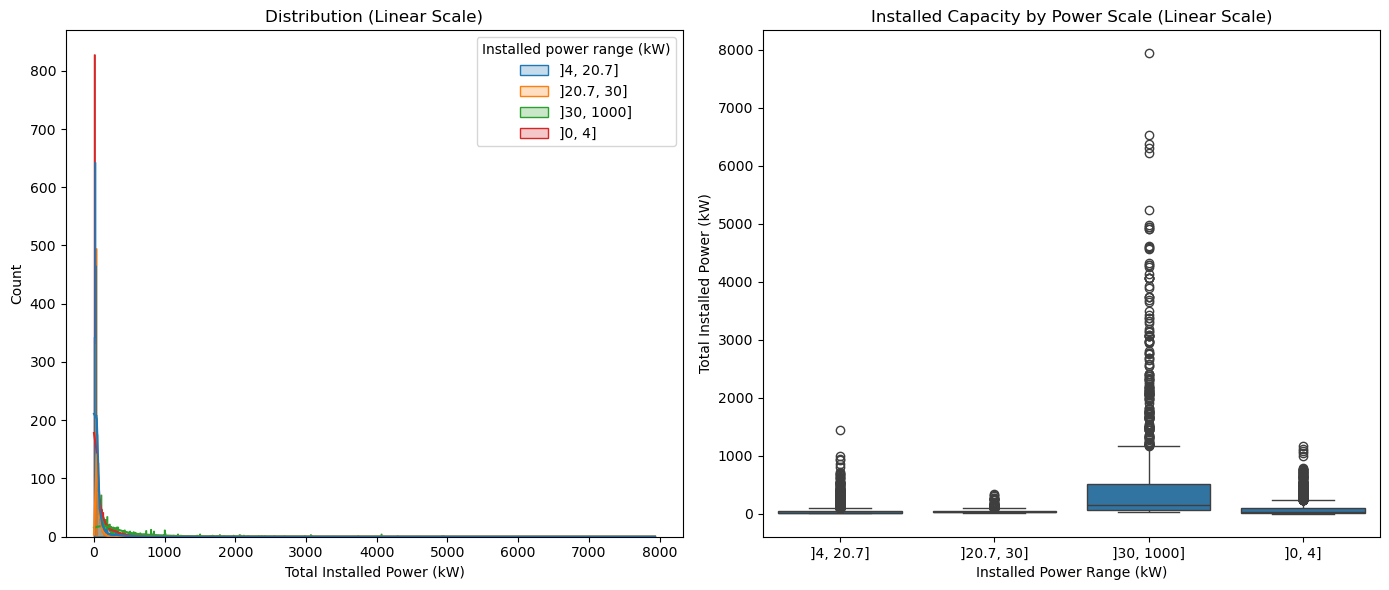

In [48]:
# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

# --- Plot 1: Linear scale ---
sns.histplot(
    data=df3,
    x='Total installed power (kW)',
    hue='Installed power range (kW)',
    kde=True,
    element='step',
    ax=axes[0]
)
axes[0].set_title('Distribution (Linear Scale)')
axes[0].set_xlabel('Total Installed Power (kW)')
axes[0].set_ylabel('Count')

# --- Boxplot 2: Linear scale ---
sns.boxplot(
    data=df3,
    x='Installed power range (kW)',
    y='Total installed power (kW)',
    ax=axes[1]
)
axes[1].set_title('Installed Capacity by Power Scale (Linear Scale)')
axes[1].set_xlabel('Installed Power Range (kW)')
axes[1].set_ylabel('Total Installed Power (kW)')


plt.tight_layout()
plt.show()

- **Normality and Homogeity**


The distribution of total installed capacity across power scale ranges was first visualized using a histogram and boxplot (Figure X). The histogram (left panel) shows a heavily right-skewed distribution, while the boxplot (right panel) highlights multiple extreme outliers across power scale groups. These plots indicate that the raw data violate ANOVA assumptions, particularly normality and homogeneity of variances.

To address these violations, a logarithmic transformation was applied to the total installed power data. As Montgomery (2019) explains in Design and Analysis of Experiments, when residuals show increasing spread with fitted values—a funnel shape—this indicates heteroscedasticity often caused by right-skewed data. Applying a log transformation stabilizes the variance and makes the data distribution closer to normal, thus improving the validity of ANOVA results. In this approach, one should note that the conclusions of the analysis of variance apply to the transformed populations.

Chapter 3, Section 3.4.3 - Plot of Residuals Versus Fitted Values \
[Montgomery, D. C. (2019). *Design and Analysis of Experiments* (9th ed.). Wiley.](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwj905nZ5bCQAxWPVKQEHZ19N98QFnoECBcQAQ&url=https%3A%2F%2Fwww.researchgate.net%2Fprofile%2FFarshad-Fattahi%2Fpost%2FNeed-the-procedure-for-critical-limit-fixation%2Fattachment%2F59d6459179197b80779a0aa7%2FAS%253A453901993418752%25401485230076186%2Fdownload%2FDouglas-C.-Montgomery-Design-and-Analysis-of-Experiments-Wiley-2012.pdf&usg=AOvVaw1-ekZhSg7KCWTosG9nOwQA&opi=89978449)


In [49]:
# Create a new column with log-transformed total installed power
df3['log_total_power'] = np.log1p(df3['Total installed power (kW)'])

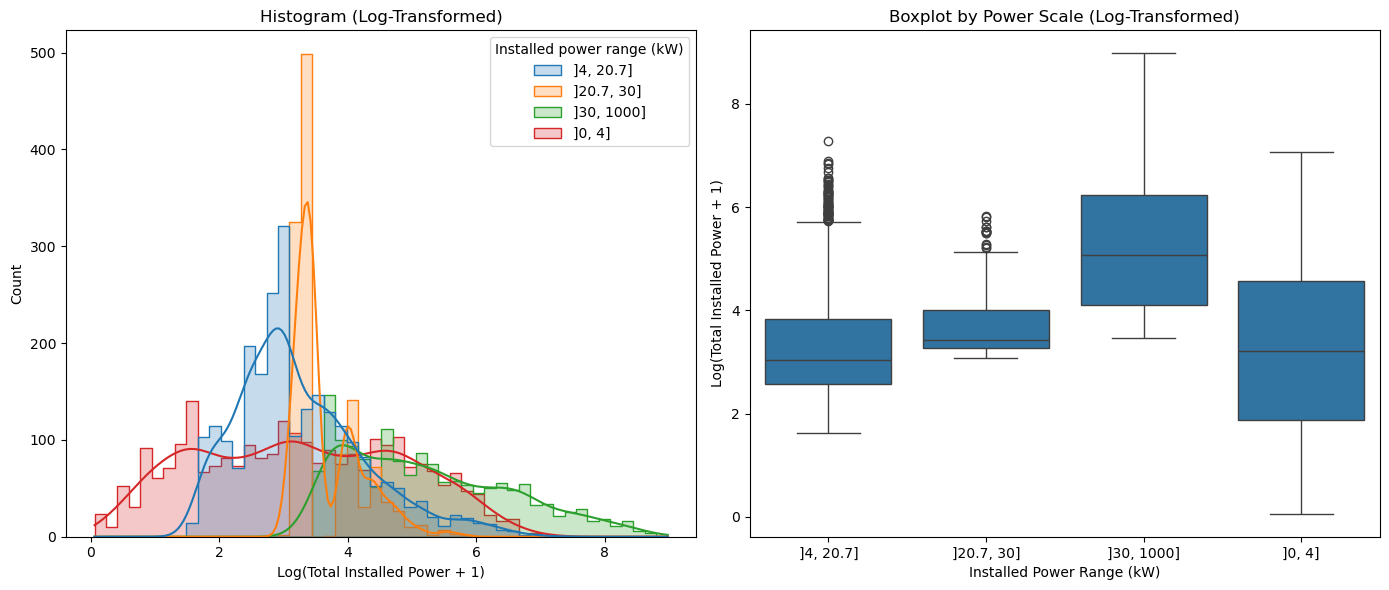

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

# --- Plot 1: Histogram (log-transformed) ---
sns.histplot(
    data=df3,
    x='log_total_power',
    hue='Installed power range (kW)',
    kde=True,
    element='step',
    ax=axes[0]
)
axes[0].set_title('Histogram (Log-Transformed)')
axes[0].set_xlabel('Log(Total Installed Power + 1)')

# --- Plot 2: Boxplot (log-transformed) ---
sns.boxplot(
    data=df3,
    x='Installed power range (kW)',
    y='log_total_power',
    ax=axes[1]
)
axes[1].set_title('Boxplot by Power Scale (Log-Transformed)')
axes[1].set_xlabel('Installed Power Range (kW)')
axes[1].set_ylabel('Log(Total Installed Power + 1)')

plt.tight_layout()
plt.show()

- **Normality and Homogeity**

Visual inspection of the histogram and boxplot of the log-transformed data revealed that the distributions became approximately symmetric across all power scale groups. This transformation reduced the influence of extreme values and stabilized the variance, allowing the assumptions of ANOVA to be reasonably met. 
\
Furthermore, the boxplot shows that the spread of the boxes is fairly similar across groups, reinforcing the conclusion that the variances are approximately homogeneous. Consequently, it is appropriate to proceed with a two-way ANOVA on the log-transformed data to assess the effects of power scale and season.

In [51]:
# Two-way ANOVA
import pingouin as pg

# Rename columns to safe names
df3 = df3.rename(columns={
    'Installed power range (kW)': 'PowerRange'
})

aov = pg.anova(
    dv='log_total_power',
    between=['PowerRange', 'Season'],
    data=df3,
    detailed=True
)

display(aov)

,Source,SS,DF,MS,F,p-unc,np2
0,PowerRange,4866.097412,3.0,1622.032471,1060.550937,0.000000,0.285615
1,Season,23.317030,1.0,23.317030,15.245625,0.000095,0.001912
2,PowerRange * Season,0.276263,3.0,0.092088,0.060211,0.980652,0.000023
3,Residual,12171.159300,7958.0,1.529424,NaN,NaN,NaN


### ANOVA Results and Interpretation

The results of the two-way ANOVA on log-transformed total installed power indicate a **highly significant effect of power scale** (installed power range) on total installed capacity (F(3, 7958) = 1060.55, p < 0.001, η² = 0.286), showing that the installed capacity differs substantially across different power ranges.

**Season (winter vs summer)** also had a statistically significant effect (F(1, 7958) = 15.25, p < 0.001), but the effect size was very small (η² = 0.0019), indicating that seasonal differences are minimal in practical terms.

The **interaction between power scale and season** was not significant (F(3, 7958) = 0.06, p = 0.981, η² ≈ 0), suggesting that the effect of power scale on total installed capacity is consistent across seasons.

**Hypothesis testing conclusions:**
- **Power Scale:** Reject $H_0$. Total installed capacity differs significantly across power scales.  
- **Season:** Reject $H_0$, although the effect is very small in practice.  
- **Interaction:** Do not reject $H_0$. There is no significant interaction; the effect of power scale is consistent across seasons.

In summary, based on the **log-transformed data**, the total installed capacity is primarily determined by the power scale, with only minor variation between winter and summer, and no evidence that seasonal effects differ between power ranges. These findings align with expectations that larger installations contribute disproportionately to total capacity, while seasonal effects are relatively small.  

> **Note:** These conclusions apply specifically to the **transformed populations** and may not directly reflect the raw (non-transformed) data distribution.

<div id="results"></div>
<strong><a href="#top">Back to top</a></strong>

# Results and Discussion

<div id="conclusion"></div>
<strong><a href="#top">Back to top</a></strong>

# Conclusion

<strong><a href="#top">Back to top</a></strong>